In [1]:
%matplotlib inline

# Pattern recognition

In [2]:
import matplotlib.pyplot
import numpy
import scipy
import sklearn.ensemble
import skimage.io
import sklearn.datasets
import sklearn.cluster
import sklearn.feature_extraction.image

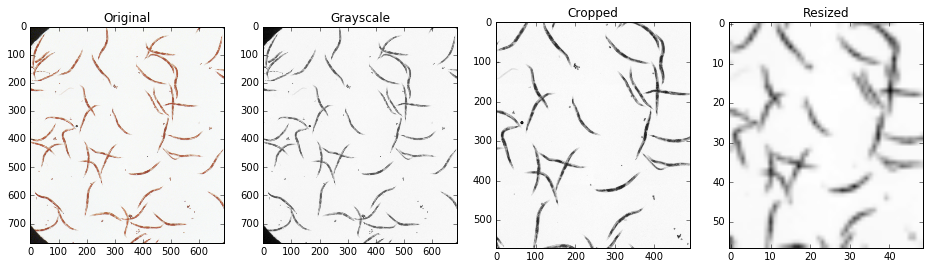

In [3]:
image = skimage.io.imread("images/BBBC011/L4440/1/1.png")

grayscale = skimage.color.rgb2gray(image)

cropped = skimage.util.crop(grayscale, 100)

resized = scipy.misc.imresize(cropped, 0.10) / 255.0

_, (a, b, c, d) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=4
)

a.imshow(image)
a.set_title("Original")

b.imshow(grayscale, cmap=matplotlib.pyplot.cm.gray)
b.set_title("Grayscale")

c.imshow(cropped, cmap=matplotlib.pyplot.cm.gray)
c.set_title("Cropped")

d.imshow(resized, cmap=matplotlib.pyplot.cm.gray)
d.set_title("Resized")

matplotlib.pyplot.show()

## Supervised learning

### Ensemble learning

#### Random forest

## Unsupervised learning

### Cluster analysis

#### Spectral clustering

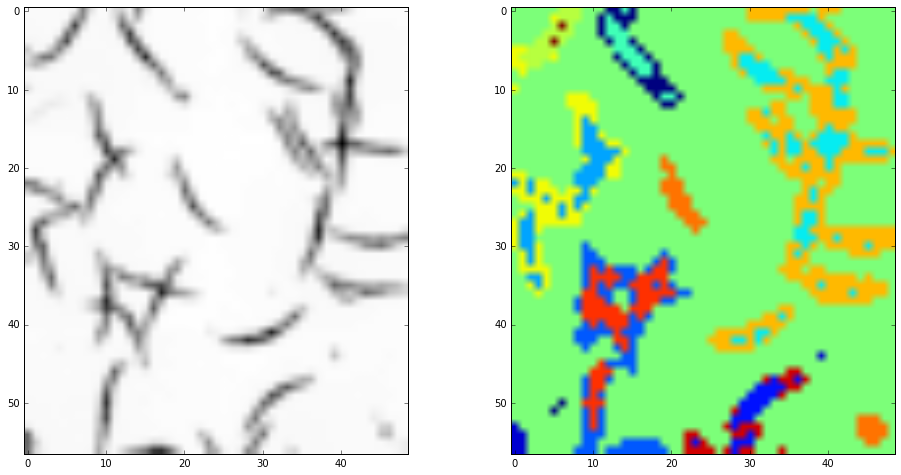

In [ ]:
_, (a, b) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=2
)

graph = sklearn.feature_extraction.image.img_to_graph(resized)

mask = resized.astype(bool)

n_clusters = 15

labels = sklearn.cluster.spectral_clustering(
    affinity=graph, 
    eigen_solver="arpack", 
    n_clusters=n_clusters
)

label_image = -numpy.ones(mask.shape)
label_image[mask] = labels

a.imshow(resized, cmap=matplotlib.pyplot.cm.gray)

b.imshow(resized, cmap=matplotlib.pyplot.cm.gray)
b.imshow(label_image)

#### Hierarchical clustering

##### Ward’s method

In [ ]:
X = numpy.reshape(resized, (-1, 1))

graph = sklearn.feature_extraction.image.img_to_graph(resized)

n_clusters = 30

ward = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters, 
    linkage="ward", 
    connectivity=graph
)

ward.fit(X)

label = numpy.reshape(ward.labels_, resized.shape)

_, (a, b) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=2
)

a.imshow(cropped, cmap=matplotlib.pyplot.cm.gray)

b.imshow(resized, cmap=matplotlib.pyplot.cm.gray)

for l in range(n_clusters):
    b.contour(label == l, contours=1, colors=[matplotlib.pyplot.cm.spectral(l / float(n_clusters)), ])

matplotlib.pyplot.show()

/usr/local/var/pyenv/versions/2.7.11/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:207: UserWarning: the number of connected components of the connectivity matrix is 780 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
